<a href="https://colab.research.google.com/github/sprhdr/Gold-Price-Prediction/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Liebraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [20]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [21]:
# print head of data frame
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [22]:
# print tail of the data frame
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [23]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [24]:
# getting some basic information about data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [25]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [26]:
# getting statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:

1. Positive Correlation

2. Negative Correlation

In [27]:
correlation = gold_data.corr()

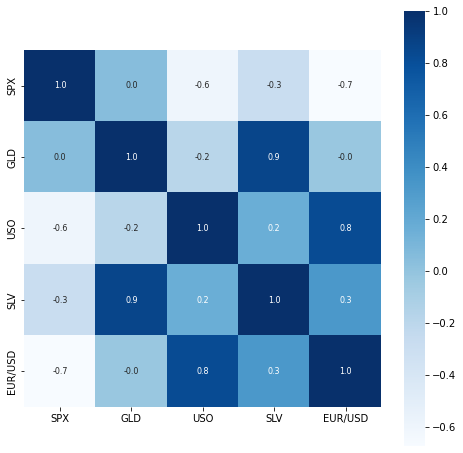

In [28]:
# constructing a heatmap to understanding correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [29]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


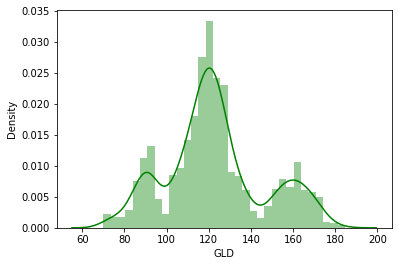

In [30]:
# checking the distribution of GLD price
sns.distplot(gold_data['GLD'], color='green')

Splitting the Features and Target

In [31]:
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']

In [32]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [33]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Traininig Data and Test Data

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Model Training:

Random Forest Regressor

In [39]:
regressor = RandomForestRegressor(n_estimators=100)

In [40]:
# training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [41]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [42]:
print(test_data_prediction)

[168.52589906  81.89019977 116.25289985 127.73770078 120.74260103
 154.89659819 150.0620988  125.9878002  117.36949873 126.04780081
 116.83630088 172.52040081 141.84659977 167.52369836 114.97910036
 117.9770007  139.46380318 170.20980079 159.66250256 157.5359
 155.11050013 124.61230019 175.95199959 157.48920335 125.28880058
  93.67819993  78.38760025 120.55580009 119.13499947 167.48029955
  88.04150054 125.39280008  91.34420081 117.74090014 121.09819912
 135.81220117 115.54500117 115.09770077 149.04610016 107.37370126
 103.97870259  87.03549764 126.46690044 118.03530024 153.69159897
 119.54570008 108.32940023 107.95269872  93.06030017 127.05979786
  74.64480029 113.63769935 121.19380016 111.32419928 118.77639867
 120.69869951 158.89560023 166.22010147 146.85599699  85.78949854
  94.37170049  86.81169874  90.55969979 118.85940091 126.39340083
 127.43039989 168.87200035 122.27459973 117.37209884  98.37410019
 168.38630191 142.69659812 132.0131027  121.17290215 120.71879921
 119.65980052 

In [43]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R squared error : ', error_score)

R squared error :  0.989085629770812


Compare the Actual Values and Predicted Values in a Plot

In [44]:
Y_test = list(Y_test)

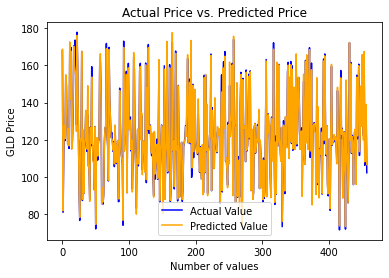

In [46]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='orange', label='Predicted Value')
plt.title('Actual Price vs. Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()